In [1]:
#https://stackoverflow.com/questions/47330244/generating-random-transition-probability-matrix-python
#https://docs.python.org/3/library/random.html
#ref: https://www.datacamp.com/tutorial/markov-chains-python-tutorial

In [2]:
from Transition import Transition

[[0.5613011  0.43183885 0.00686005]
 [0.22021877 0.56978174 0.20999949]
 [0.68962087 0.24836806 0.06201107]]
[[0.5613011  0.43183885 0.00686005]
 [0.22021877 0.56978174 0.20999949]
 [0.68962087 0.24836806 0.06201107]]


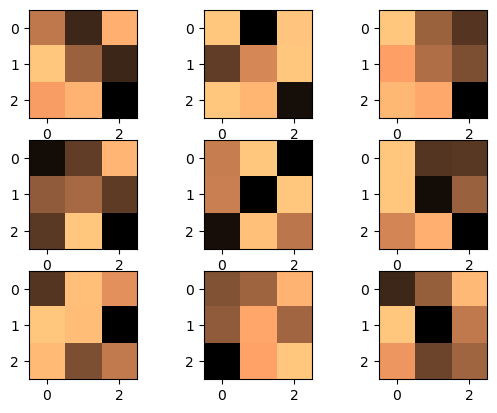

In [3]:
import datetime

Tra = Transition(3,3)

for _ in range(1):
    Tra.gen_state_prob(3, "uniform")
    M = Tra.get_transition_matrix()
    print(M)


print(M)

import numpy as np
from matplotlib import pyplot as plt
"""
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(M, cmap="copper_r")
plt.colorbar(im)
plt.show()
"""
figure, axis = plt.subplots(3, 3)

for i in range(3):
    for j in range(3):
        Tra.gen_state_prob(3, "uniform")
        M = Tra.get_transition_matrix()
        plt.rcParams["figure.autolayout"] = True
        axis[i,j].imshow(M, cmap="copper_r")
        


#axis[0, 1].plot(X, Y2)
#axis[0, 1].set_title("Cosine Function")
#plt.savefig("plots/TM-heatmap-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show()

## Plot State Transition Diagram

In [4]:
'''
import numpy as np
from matplotlib import pyplot as plt

# Import the MarkovChain class from markovchain.py
from markovchain import MarkovChain
P = np.array(transition_matrix)
mc = MarkovChain(P, ['left', 'straight', 'right'])
mc.draw()
'''

"\nimport numpy as np\nfrom matplotlib import pyplot as plt\n\n# Import the MarkovChain class from markovchain.py\nfrom markovchain import MarkovChain\nP = np.array(transition_matrix)\nmc = MarkovChain(P, ['left', 'straight', 'right'])\nmc.draw()\n"

## Simulate Map

[ 3 16 18 10  8 13 17 17  9 14 19 16  0 13 13  9 10  8  4 16  5  3 17  4
  0 11  4  6 19  6  4  5  8 17 18 10  9 16]
next_time_step {0: [10, array([[0.93537342, 0.0085011 , 0.05612548],
       [0.76600364, 0.15031612, 0.08368025],
       [0.05800909, 0.33770827, 0.60428264]]), 'left', 6], 1: [10, array([[0.1497885 , 0.55002345, 0.30018805],
       [0.56731591, 0.25098392, 0.18170017],
       [0.48526584, 0.04870775, 0.46602641]]), 'left', 17], 2: [10, array([[0.12698852, 0.27219199, 0.6008195 ],
       [0.19229586, 0.41043755, 0.39726659],
       [0.31361199, 0.42822557, 0.25816244]]), 'left', 19], 3: [10, array([[0.20981988, 0.35915614, 0.43102398],
       [0.25322173, 0.34662894, 0.40014933],
       [0.89087843, 0.03400806, 0.07511351]]), 'left', 7], 4: [10, array([[0.15138363, 0.7021027 , 0.14651367],
       [0.38088844, 0.36925311, 0.24985844],
       [0.78384918, 0.11010359, 0.10604723]]), 'straight', 11], 5: [10, array([[0.01062602, 0.20284703, 0.78652695],
       [0.28697327, 0.

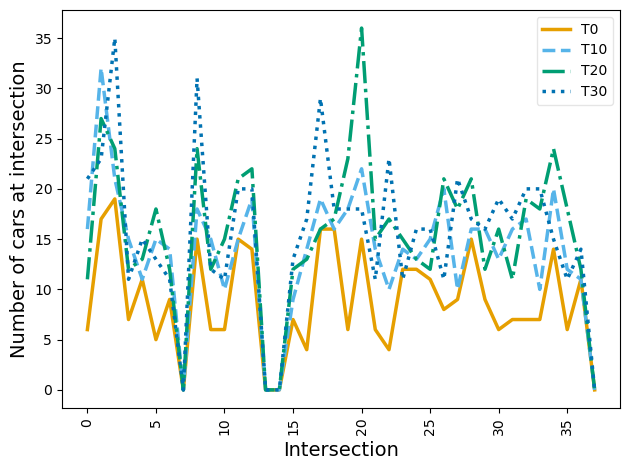

In [5]:
from MarkovProcess import MarkovChain
from Population import Population
from Simulate import Simulate

P = Population(20,0.5,0.5,no_intersections=38)
no_of_timesteps = 40
time_steps = [10, 50]
time_val = 50
for i in range(no_of_timesteps-2):
    time_val += 50
    time_steps.append(time_val)
#print("time_steps:", time_steps)

S = Simulate(time_steps)

S.addCars = True        #add new cars at every time step
S.addActCars = False


S.runSimulation(P)
print("lMap: ", len(S.getLMap()))
#print("lCars: ", S.getLCars())
#S.printMap(True)
S.plotData()


Features, Labels = S.getLearningData()
#[print(Features[i]) for i in range(5)] 
#print()
#[print(Labels[i]) for i in range(5)] 

S.generateTestingData(100)
tFeatures, tLabels = S.getTestingData()
#print(tLabels)
#print(tFeatures)

#override features
#S.generateTestingData(1000)
#Features, Labels = S.getTestingData()

del S

In [6]:
#https://vknight.org/unpeudemath/code/2015/08/01/simulating_continuous_markov_chains.html

## Plot MarkovChain

In [7]:
'''
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)
'''

'\nimport pygraphviz as pgv\nfrom IPython.display import Image\n\ndef draw(dot):\n    return Image(pgv.AGraph(dot).draw(format=\'png\', prog=\'dot\'))\n\ng1 = """digraph top {\n   a -> b -> c;\n}"""\ndraw(g1)\n'

## Decision Tree Classifier

In [8]:
from sklearn import tree
X = Features
Y = Labels
DTpLabels = []
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

matched = 0
for i in range(len(tFeatures)):
    #print(clf.predict([tFeatures[i]]),"-->",tLabels[i])
    if clf.predict([tFeatures[i]]) == tLabels[i]:
        matched+=1
    DTpLabels.append(clf.predict([tFeatures[i]])[0])
        
#print(len(DTpLabels), len(tLabels))
print("accuracy: ", matched/len(tFeatures))

#clf.predict([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])
#clf.predict_proba([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])

accuracy:  0.48


In [9]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("traffic_tree") 
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("traffic_tree") \n'

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics

classifier = LogisticRegression()
classifier.fit(Features, Labels)
score = metrics.accuracy_score(Labels, classifier.predict(Features))
print("Accuracy: %f" % score)

Accuracy: 0.463563


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

## Neural Network MLP Classifier

data: 1482
labels: 1482
MinMaxScaler()
[0.4032469  0.45917759 0.14984113 0.44508661 0.47364665 0.1157678
 0.69399054 0.32116054 0.00701893 1.         0.         0.        ]
[0.05326429 0.05140539 0.92013464 0.06610561 0.40989624 0.5611434
 0.4932829  0.38082587 0.14447796 0.         1.         0.        ]
[0.09787883 0.80614465 0.1027108  0.25891459 0.18848994 0.58848958
 0.70028137 0.13623758 0.18700295 0.         1.         0.        ]
[0.62455567 0.15052276 0.24253657 0.2191173  0.0244214  0.79269144
 0.08182413 0.88318289 0.04366034 0.         0.         1.        ]
[0.01728864 0.14204496 0.86365269 0.01229258 0.47385555 0.55134551
 0.1155481  0.03326387 0.8661449  0.         1.         0.        ]
MinMaxScaler()
accuracy:  0.63
score: 0.626855600539811
loss: 0.8371664624851762


/Users/haider/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


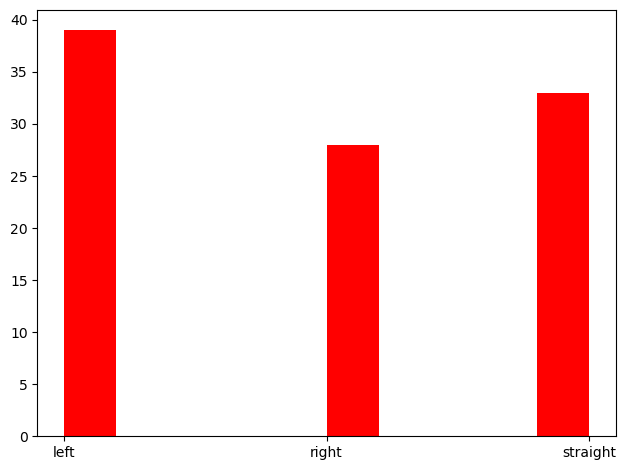

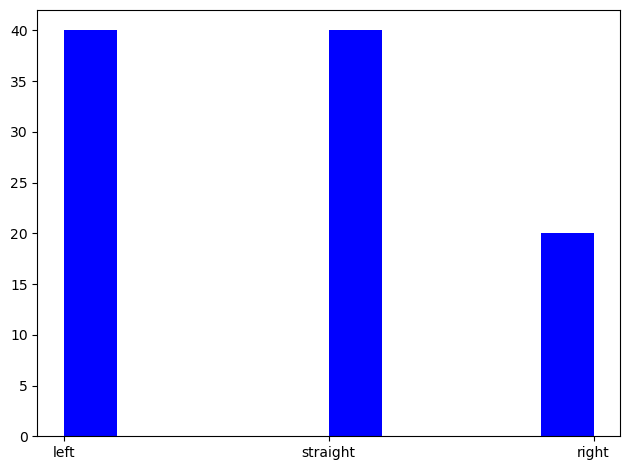

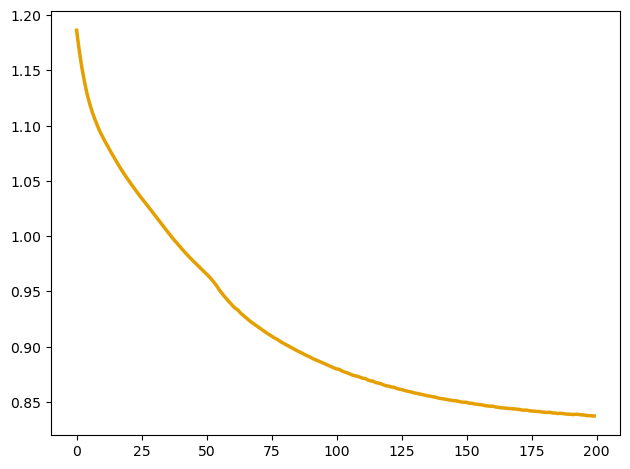

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
X = Features
y = Labels
MLPpLabels = []
    

print("data:",len(X))
print("labels:",len(y))

#scale learning data
dataX = X
scaler = MinMaxScaler()
print(scaler.fit(dataX))
dataX = scaler.transform(dataX)

[print(dataX[i]) for i in range(5)] 

clf = MLPClassifier(activation="relu",
                    solver='adam',#'lbfgs', 
                    alpha=0.00001,
                    hidden_layer_sizes=(12, ), 
                    random_state=1,
                    batch_size='auto',
                    early_stopping=False,
                    warm_start=True)

clf.fit(dataX, y)

#scale testing data
tDataX = tFeatures
scaler = MinMaxScaler()
print(scaler.fit(tDataX))
tDataX = scaler.transform(tDataX)

matched = 0
lbl = ""
for i in range(len(tDataX)):
    L = clf.predict([tDataX[i]])
    if L == tLabels[i]:
        matched+=1
    MLPpLabels.append(L[0])

print("accuracy: ", matched/len(tDataX))
print("score:", clf.score(dataX, y))
print("loss:", clf.loss_)

from matplotlib import pyplot as plt

plt.hist(tLabels, color='r')
#plt.legend()
plt.show()
plt.hist(MLPpLabels, color='b')
plt.show()
#print("tLabels", tLabels)
#print("MLPpLabels", MLPpLabels)

plt.plot(clf.loss_curve_, label="loss")
#plt.plot(clf.best_validation_score_, label="validation")

#plt.legend(True)
plt.show()



#clf.predict_proba([[2., 2.], [1., 2.]])

## Confusion Matrix

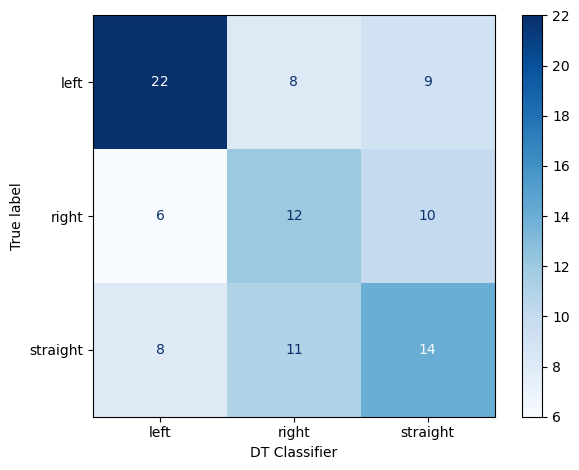

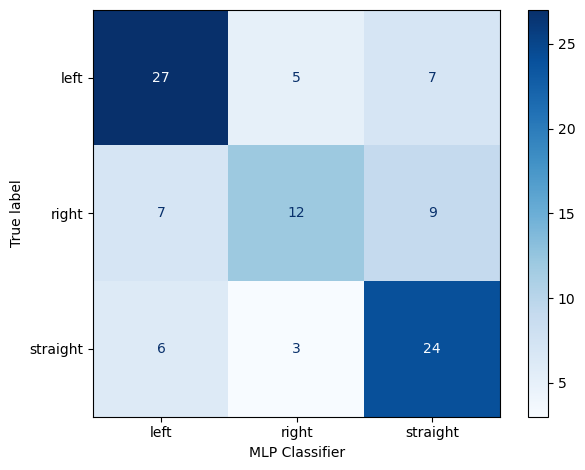

In [12]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import datetime

actual = tLabels

confusion_matrix = metrics.confusion_matrix(actual, DTpLabels, labels=clf.classes_)#["left", "straight", "right"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)#[False, True])
cm_display.plot(cmap = 'Blues')
#plt.savefig("plots/confusion-matrix-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.xlabel("DT Classifier")
plt.show() 

confusion_matrix = metrics.confusion_matrix(actual, MLPpLabels, labels=clf.classes_)#["left", "straight", "right"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)#[False, True])
cm_display.plot(cmap = 'Blues')
#plt.savefig("plots/confusion-matrix-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.xlabel("MLP Classifier")
plt.show()



In [13]:
#LATEST 01/19